## Example Usage of UniFace Library
This guide demonstrates how to use the **UniFace** library for face detection and visualization in this Jupyter Notebook. Follow the steps below to set up and execute the example.

## 1. Install UniFace
Install the **UniFace** library using `pip`. The `-q` flag suppresses logs for a clean output.

In [1]:
!pip install -q uniface

## 2. Import Required Libraries
Import the necessary libraries for image processing and visualization:

In [2]:
import cv2
from PIL import Image
import IPython.display as display
from uniface import RetinaFace, draw_detections

- `cv2`: Used for image reading and processing.
- `PIL`: For displaying images inline in the notebook.
- `display`: To render PIL images within the notebook.
- `RetinaFace`: The model class from the **UniFace** library.
- `draw_detections`: A utility function to draw bounding boxes and landmarks on the image.

## 3. Initialize the RetinaFace Model
Initialize the RetinaFace model with a lightweight pre-trained backbone and detection parameters:

In [3]:
# Initialize the RetinaFace model
uniface_inference = RetinaFace(
    model="retinaface_mnet_v2",  # Model name
    conf_thresh=0.5,             # Confidence threshold
    pre_nms_topk=5000,           # Pre-NMS Top-K detections
    nms_thresh=0.4,              # NMS IoU threshold
    post_nms_topk=750            # Post-NMS Top-K detections,
)

2024-11-21 02:30:01,997 - INFO - Initializing RetinaFace with model=retinaface_mnet_v2, conf_thresh=0.5, nms_thresh=0.4, pre_nms_topk=5000, post_nms_topk=750, dynamic_size=False, input_size=(640, 640)
2024-11-21 02:30:02,036 - INFO - Verified model weights located at: /home/yakhyo/.uniface/models/retinaface_mnet_v2.onnx
2024-11-21 02:30:02,133 - INFO - Successfully initialized the model from /home/yakhyo/.uniface/models/retinaface_mnet_v2.onnx


## 4. Load and Display the Input Image
Load an image using PIL to display it inline before performing inference:

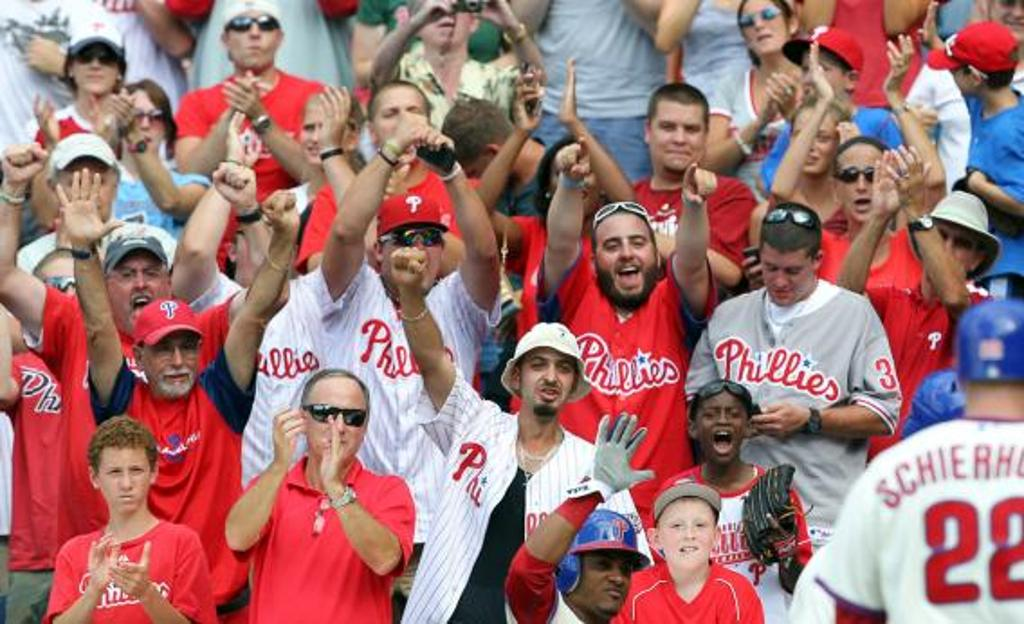

In [4]:
image_path = "../assets/test.jpg"
pil_image = Image.open(image_path)
pil_image

## 5. Perform Inference and Display Results
Run the face detection inference and display the processed image with bounding boxes and landmarks:

#faces: 27


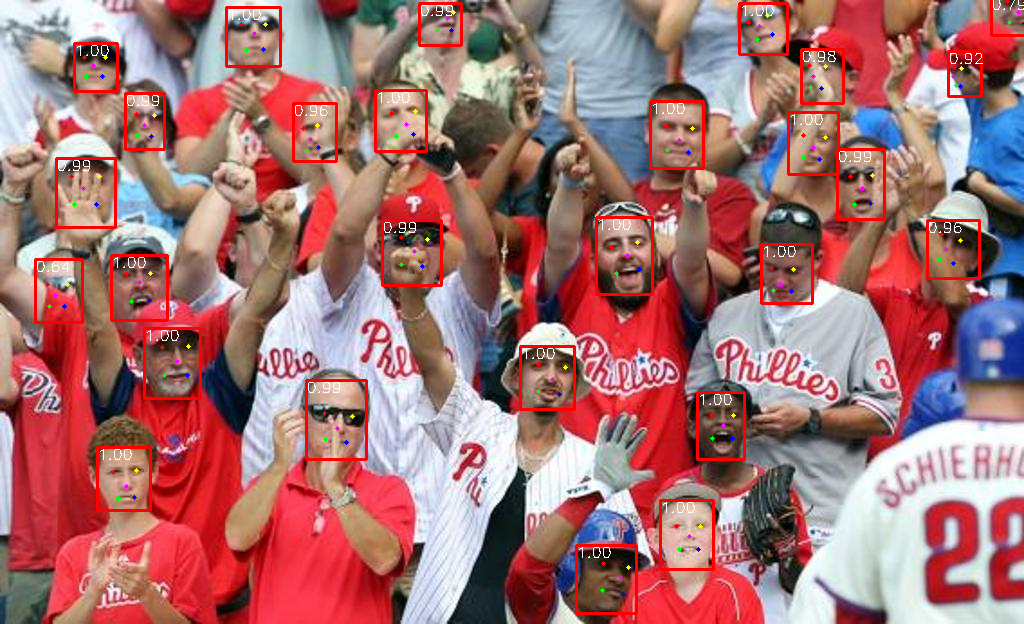

In [5]:
# Load an image
original_image = cv2.imread(image_path)

# Perform inference
boxes, landmarks = uniface_inference.detect(original_image)

# Visualize results
draw_detections(original_image, (boxes, landmarks), vis_threshold=0.6)

# Convert BGR to RGB for correct color rendering
output_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Use PIL to display the image in the notebook
output_pil = Image.fromarray(output_image)
display.display(output_pil)

### Key Notes:
- Ensure that the **image path** (`../assets/test.jpg`) points to a valid image file.
- Adjust detection thresholds (`conf_thresh`, `nms_thresh`) in **RetinaFace** for specific use cases.
- Use the **draw_detections** function to easily visualize the results on the processed image.